<a href="https://colab.research.google.com/github/TylerRobichaux/DS-Unit-2-Kaggle-Challenge/blob/master/module4-classification-metrics/LS_DS_224_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 2, Module 4*

---

# Classification Metrics

## Assignment
- [ ] If you haven't yet, [review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2), then submit your dataset.
- [ ] Plot a confusion matrix for your Tanzania Waterpumps model.
- [ ] Continue to participate in our Kaggle challenge. Every student should have made at least one submission that scores at least 70% accuracy (well above the majority class baseline).
- [ ] Submit your final predictions to our Kaggle competition. Optionally, go to **My Submissions**, and _"you may select up to 1 submission to be used to count towards your final leaderboard score."_
- [ ] Commit your notebook to your fork of the GitHub repo.
- [ ] Read [Maximizing Scarce Maintenance Resources with Data: Applying predictive modeling, precision at k, and clustering to optimize impact](http://archive.is/DelgE), by Lambda DS3 student Michael Brady. His blog post extends the Tanzania Waterpumps scenario, far beyond what's in the lecture notebook.


## Stretch Goals

### Reading

- [Attacking discrimination with smarter machine learning](https://research.google.com/bigpicture/attacking-discrimination-in-ml/), by Google Research, with  interactive visualizations. _"A threshold classifier essentially makes a yes/no decision, putting things in one category or another. We look at how these classifiers work, ways they can potentially be unfair, and how you might turn an unfair classifier into a fairer one. As an illustrative example, we focus on loan granting scenarios where a bank may grant or deny a loan based on a single, automatically computed number such as a credit score."_
- [Notebook about how to calculate expected value from a confusion matrix by treating it as a cost-benefit matrix](https://github.com/podopie/DAT18NYC/blob/master/classes/13-expected_value_cost_benefit_analysis.ipynb)
- [Visualizing Machine Learning Thresholds to Make Better Business Decisions](https://blog.insightdatascience.com/visualizing-machine-learning-thresholds-to-make-better-business-decisions-4ab07f823415)


### Doing
- [ ] Share visualizations in our Slack channel!
- [ ] RandomizedSearchCV / GridSearchCV, for model selection. (See module 3 assignment notebook)
- [ ] Stacking Ensemble. (See module 3 assignment notebook)
- [ ] More Categorical Encoding. (See module 2 assignment notebook)

In [0]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [0]:
import pandas as pd

# Merge train_features.csv & train_labels.csv
train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))

# Read test_features.csv & sample_submission.csv
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')

In [3]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(train, test_size=14358)
train.shape, val.shape, test.shape

((45042, 41), (14358, 41), (14358, 40))

In [0]:
import numpy as np

train = train.replace(0, np.nan)
test = test.replace(0, np.nan)

In [0]:
X_train = train.drop('status_group', axis=1)
y_train = train['status_group']
X_val = val.drop('status_group', axis=1)
y_val = val['status_group']
X_test = test

In [0]:
X_test = X_test.drop(['quantity_group', 'payment_type'], axis = 1)
X_train = X_train.drop(['quantity_group', 'payment_type'], axis = 1)
X_val = X_val.drop(['quantity_group', 'payment_type'], axis = 1)

In [0]:
X_test = X_test.drop(['recorded_by', 'id'], axis = 1)
X_train = X_train.drop(['recorded_by', 'id'], axis = 1)
X_val = X_val.drop(['recorded_by', 'id'], axis = 1)

In [8]:
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint, uniform




pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(max_depth=250, min_samples_split= 89, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)
y_pred


#Everything above is copy pasted from previous assignment.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


array(['non functional', 'functional', 'functional', ..., 'functional',
       'functional', 'functional needs repair'], dtype=object)

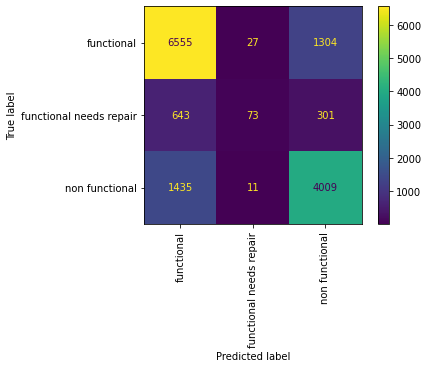

In [9]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(pipeline, X_val, y_val, values_format='.0f', xticks_rotation='vertical');
#well that was easy

In [11]:
#I am jsut going to try and do a better job finding hyper parameters.



,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,waterpoint_type_group
27615,NaN,2012-10-28,Hesawa,NaN,DWE,NaN,-2.000000e-08,Kwa Kanyele,NaN,Lake Victoria,Madukani,Mwanza,19,2.0,Magu,Nyaluhande,NaN,True,VWC,NaN,True,NaN,other,other,other,vwc,user-group,never pay,soft,good,enough,shallow well,shallow well,groundwater,other,other
768,500.0,2011-03-08,Government Of Tanzania,1631.0,DWE,38.236418,-4.483622e+00,Kwa Mzee Rajabu,NaN,Pangani,Kilimia,Tanga,4,1.0,Lushoto,Sunga,1.0,True,VWC,Shengui forest,True,1971.0,gravity,gravity,gravity,vwc,user-group,pay monthly,soft,good,enough,spring,spring,groundwater,communal standpipe,communal standpipe
7890,NaN,2013-01-22,Tcrs,1431.0,TCRS,30.582527,-5.773348e+00,Plot 26,NaN,Lake Tanganyika,Barabara 4,Rukwa,15,1.0,Mpanda,Mishamo,186.0,True,Water authority,NaN,True,1986.0,other,other,other,water authority,commercial,never pay,soft,good,enough,machine dbh,borehole,groundwater,hand pump,hand pump
40731,NaN,2011-09-04,Unicef,1653.0,DWE,34.603470,-9.076238e+00,Kwa Edward Ng'Ahala,NaN,Rufiji,Kati,Iringa,11,4.0,Njombe,Usuka,20.0,True,WUA,wanging'ombe water supply s,True,1978.0,gravity,gravity,gravity,wua,user-group,pay when scheme fails,soft,good,enough,river,river/lake,surface,communal standpipe,communal standpipe
52422,5.0,2013-03-28,Ces (gmbh),1370.0,DWE,37.264008,-3.224392e+00,Kwa Dawsen Mushi,NaN,Pangani,Makashu,Kilimanjaro,3,4.0,Moshi Rural,Kibosho Magharibi,30.0,NaN,Water Board,Lyamungo umbwe water supply,True,2007.0,gravity,gravity,gravity,water board,user-group,pay per bucket,soft,good,enough,river,river/lake,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24480,30.0,2011-02-23,Jaica,59.0,JAICA,39.328646,-7.037468e+00,Kwa Jado,NaN,Wami / Ruvu,Mwajasi,Pwani,60,43.0,Mkuranga,Vikindu,1.0,True,VWC,Vianzi Water Supply,NaN,2010.0,submersible,submersible,submersible,vwc,user-group,pay per bucket,soft,good,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe
25005,NaN,2011-09-17,He,NaN,HE,31.510696,-2.057536e+00,Kanisani,NaN,Lake Victoria,Nkomero,Kagera,18,3.0,Muleba,Kasharunga,NaN,True,NaN,B,NaN,NaN,gravity,gravity,gravity,vwc,user-group,never pay,soft,good,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
16948,NaN,2011-02-17,Private Individual,340.0,Athumani Janguo,38.834838,-7.191869e+00,Athumani Janguo,NaN,Wami / Ruvu,Maleta,Pwani,60,33.0,Kisarawe,Marumbo,500.0,True,Private operator,NaN,NaN,2009.0,other,other,other,private operator,commercial,never pay,unknown,unknown,unknown,machine dbh,borehole,groundwater,other,other
16096,NaN,2013-02-23,NaN,1220.0,NaN,35.035131,-5.074772e+00,Hula,NaN,Internal,Darajani,Singida,13,2.0,Singida Rural,Misughaa,1.0,True,VWC,NaN,NaN,1960.0,other,other,other,vwc,user-group,unknown,unknown,unknown,dry,shallow well,shallow well,groundwater,hand pump,hand pump


In [0]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(), 
    RandomForestClassifier()
)


param_distributions = {
    'randomforestclassifier__n_estimators': [50, 100, 150, 200, 350, 400, None],
    'randomforestclassifier__max_depth': [50, 100, 150, 200, 250, 300, None], 
    'randomforestclassifier__min_samples_split': randint(1, 1000),
    'randomforestclassifier__criterion': ['gini', 'entropy'],
    'simpleimputer__strategy': ['mean', 'median']
}
#Man ordinal encoding only has 2 parameters. nothing really to try diffrently

search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_distributions,  
    n_iter = 75,
    cv=20, 
    scoring='accuracy', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1
)

search.fit(X_train, y_train);

Fitting 20 folds for each of 75 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   58.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 11.9min
